# Naive Bayes Classifiers

Naive Bayes is a machine learning classification algorithm that predicts the category of a data point using probability. It assumes that all features are independent of each other. Naive Bayes performs well in many real-world applications such as spam filtering, document categorisation and sentiment analysis.

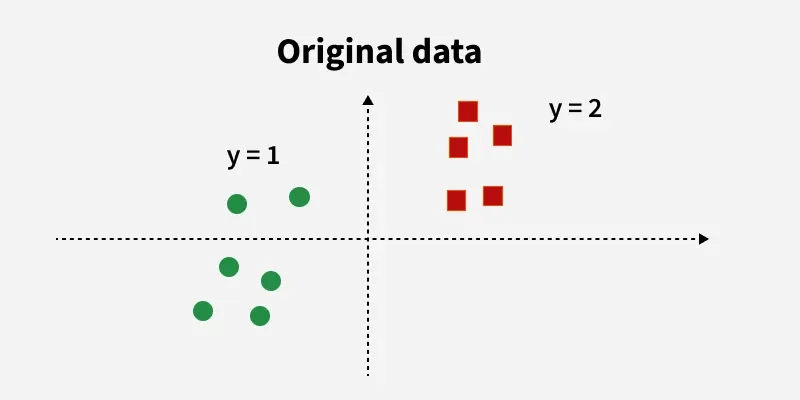

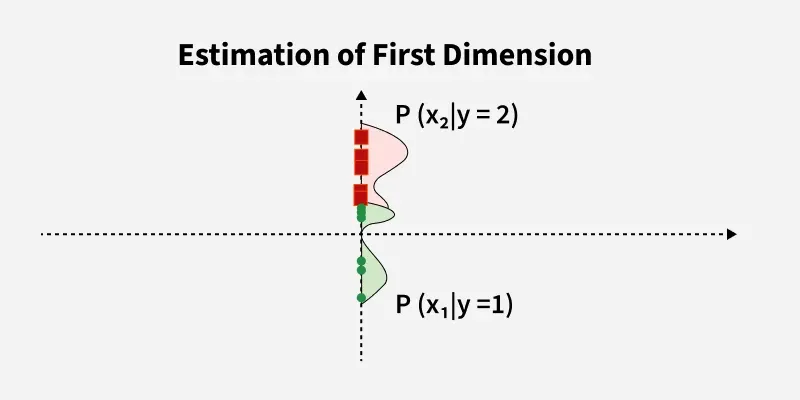

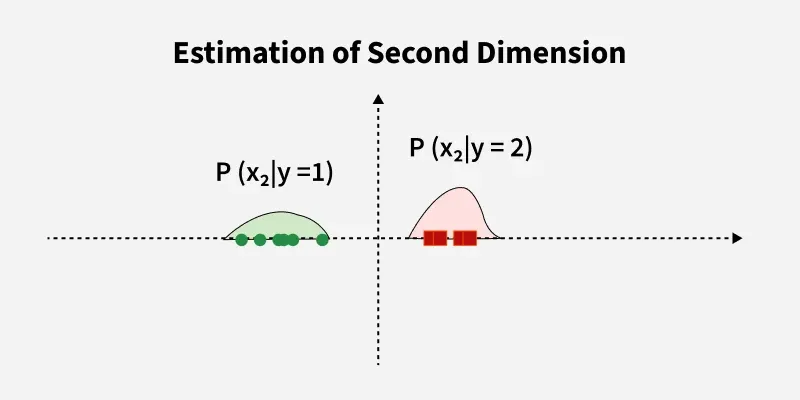

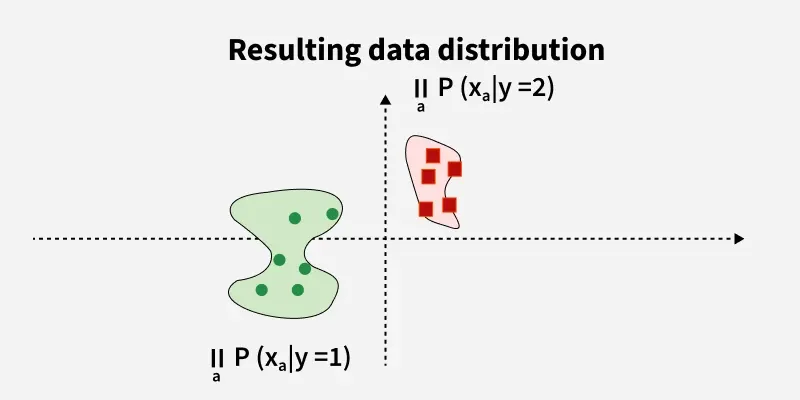

### Key Features of Naive Bayes Classifiers

- **Probabilistic Model**: Naive Bayes is based on Bayes' Theorem, which calculates the probability of a class given the features.
- **Independence Assumption**: It assumes that all features are independent of each other, which simplifies the computation.
- **Fast and Efficient**: Naive Bayes is computationally efficient and works well with large datasets.
- **Handles Categorical Data**: It can handle both continuous and categorical data effectively.
- **Robust to Irrelevant Features**: Naive Bayes can still perform well even when some features are irrelevant.

### Why it is Called Naive Bayes?

The term "naive" refers to the assumption of feature independence, which is often not true in real-world data. Despite this simplification, Naive Bayes classifiers can still perform surprisingly well in practice.

It is named as "Naive" because it assumes the presence of one feature does not affect other features. The "Bayes" part of the name refers to its basis in Bayes’ Theorem.

## Assumption of Naive Bayes

Naive Bayes makes the following assumptions:
1. **Feature Independence**: It assumes that all features are independent of each other given the class label. This means that the presence or absence of one feature does not affect the presence or absence of another feature.

2. **Equal Importance of Features**: It assumes that all features contribute equally to the outcome.

3. **Conditional Independence**: It assumes that the probability of a feature given the class label is independent of the other features.

5 **features are normally distributed:** If a feature is continuous, then it is assumed to be normally distributed within each class.

6 **Discrete features have multinomial distributions:** If a feature is discrete, then it is assumed to have a multinomial distribution within each class.

7 **Features are equally important:** All features are assumed to contribute equally to the prediction of the class label.

8 **No missing data:** The data should not contain any missing values.



## Introduction to Bayes' Theorem

Bayes' Theorem is a fundamental concept in probability theory that describes how to update the probability of a hypothesis based on new evidence. It is named after Thomas Bayes, an 18th-century statistician and theologian.

Bayes Theorem Formula:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

Where:
- \( P(A|B) \): Posterior Probability - The probability of event A occurring given that event B has occurred.
- \( P(B|A) \): Likelihood - The probability of event B occurring given that event A has occurred.
- \( P(A) \): Prior Probability - The initial probability of event A occurring.
- \( P(B) \): Marginal Probability - The total probability of event B occurring.

# Naive Bayes Working

1. Terminology

2. The Naive Assumption

3. Constructing the Naive Bayes Classifier

4. Pre-computation from Dataset
Class Probabilities:

5. Calculate Posterior Probabilities

6. Normalize Probabilities

7. Final Prediction

## Types of Naive Bayes Model

* **Gaussian Naive Bayes**: This model assumes that the features follow a normal (Gaussian) distribution. It is commonly used for continuous data.

* **Multinomial Naive Bayes**: This model is used for discrete data, particularly for text classification tasks. It assumes that the features represent the frequency of occurrences of different events.

* **Bernoulli Naive Bayes**: This model is designed for binary/boolean features. It assumes that the features are binary-valued (0 or 1), indicating the presence or absence of a feature.

## Naive Bayes Scratch Implementation using Python

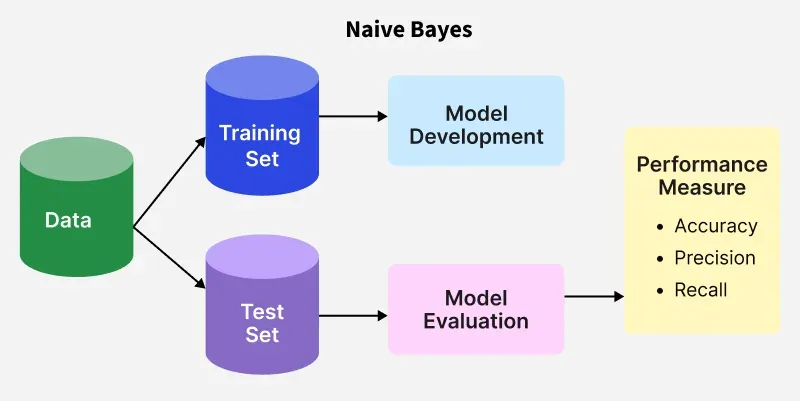


### 1. Importing Libraries

In [1]:
import math
import random
import pandas as pd
import numpy as np

### 2. Encoding Class

In [2]:
def encode_class(mydata):
    classes = []
    for i in range(len(mydata)):
        if mydata[i][-1] not in classes:
            classes.append(mydata[i][-1])
    for i in range(len(classes)):
        for j in range(len(mydata)):
            if mydata[j][-1] == classes[i]:
                mydata[j][-1] = i
    return mydata

### 3. Splitting the Data


In [3]:
def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    test = list(mydata)
    
    while len(train) < train_num:
        index = random.randrange(len(test))
        train.append(test.pop(index))
    return train, test

### 4. Grouping Data by Class

In [4]:
def groupUnderClass(mydata):
    data_dict = {}
    for i in range(len(mydata)):
        if mydata[i][-1] not in data_dict:
            data_dict[mydata[i][-1]] = []
        data_dict[mydata[i][-1]].append(mydata[i])
    return data_dict

### 5. Calculating Mean and Standard Deviation for Class

In [5]:
def MeanAndStdDev(numbers):
    avg = np.mean(numbers)
    stddev = np.std(numbers)
    return avg, stddev

def MeanAndStdDevForClass(mydata):
    info = {}
    data_dict = groupUnderClass(mydata)
    for classValue, instances in data_dict.items():
        info[classValue] = [MeanAndStdDev(attribute) for attribute in zip(*instances)]
    return info

### 6. Calculating Gaussian and Class Probabilities

In [6]:
def calculateGaussianProbability(x, mean, stdev):
    epsilon = 1e-10
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev + epsilon, 2))))
    return (1 / (math.sqrt(2 * math.pi) * (stdev + epsilon))) * expo

def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

### 7. Predicting for Test Set

In [7]:
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel = max(probabilities, key=probabilities.get)
    return bestLabel

def getPredictions(info, test):
    predictions = [predict(info, instance) for instance in test]
    return predictions

### 8. Calculating Accuracy

In [8]:
def accuracy_rate(test, predictions):
    correct = sum(1 for i in range(len(test)) if test[i][-1] == predictions[i])
    return (correct / float(len(test))) * 100.0

### 9. Loading and Preprocessing Data

In [9]:
filename = 'https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/Naivs_diabetes.csv' 
df = pd.read_csv(filename, comment='#')
mydata = df.values.tolist()

mydata = encode_class(mydata)
for i in range(len(mydata)):
    for j in range(len(mydata[i]) - 1):
        mydata[i][j] = float(mydata[i][j])

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outlier
0,4,122,61,7,52,27.822196,0.635762,48,0,0
1,1,104,56,11,0,24.245030,0.089848,60,0,0
2,3,109,62,23,0,18.876902,0.332317,61,0,0
3,3,117,87,21,108,30.492157,0.405408,25,1,0
4,2,114,56,28,10,23.147904,0.120256,25,0,0
...,...,...,...,...,...,...,...,...,...,...
995,1,87,66,8,82,25.919825,0.237532,65,1,0
996,3,156,75,21,5,16.830370,0.165928,61,1,0
997,0,105,55,12,198,25.625502,0.380023,22,1,0
998,3,151,64,25,0,34.498791,0.321169,39,0,0


### 10. Splitting Data into Training and Testing Sets

In [11]:
ratio = 0.7
train_data, test_data = splitting(mydata, ratio)

print('Total number of examples:', len(mydata))
print('Training examples:', len(train_data))
print('Test examples:', len(test_data))

Total number of examples: 1000
Training examples: 700
Test examples: 300


### 11. Training and Testing the Model

In [12]:
info = MeanAndStdDevForClass(train_data)

predictions = getPredictions(info, test_data)
accuracy = accuracy_rate(test_data, predictions)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 100.0


### 12. Evaluating Model


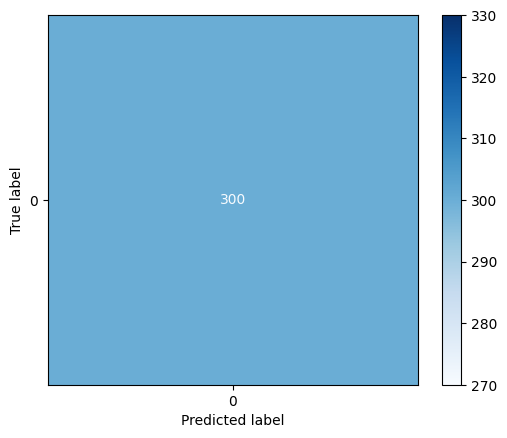

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = [row[-1] for row in test_data]
y_pred = predictions

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### 2. Precision, Recall and F1 score

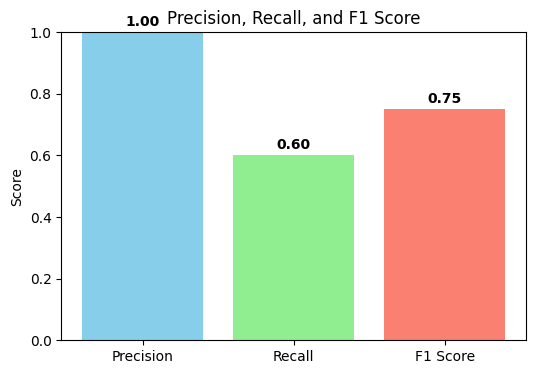

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

actual = [0, 1, 1, 0, 1, 0, 1, 1]
predicted = [0, 1, 0, 0, 1, 0, 1, 0]

precision = precision_score(actual, predicted)
recall = recall_score(actual, predicted)
f1 = f1_score(actual, predicted)

metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
    
plt.show()

# Gaussian Naive Bayes

Gaussian Naive Bayes is a type of Naive Bayes method working on continuous attributes and the data features that follows Gaussian distribution throughout the dataset. This “naive” assumption simplifies calculations and makes the model fast and efficient. Gaussian Naive Bayes is widely used because it performs well even with small datasets and is easy to implement and interpret.

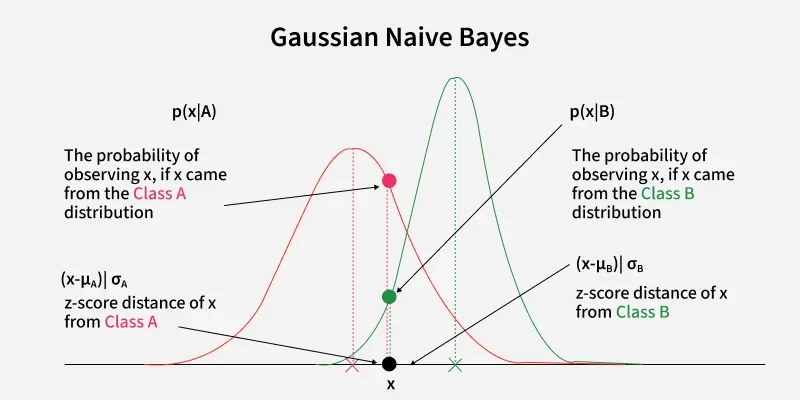

### Gaussian Naive Bayes Formula

The Gaussian Naive Bayes formula is derived from Bayes' Theorem and is used to calculate the probability of a class given a set of features, assuming that the features follow a Gaussian (normal) distribution. The formula is as follows:
$$ P(C_k | x) = \frac{P(x | C_k) \cdot P(C_k)}{P(x)} $$
Where:
- \( P(C_k | x) \): Posterior probability of class \( C_k \) given the feature vector \( x \).
- \( P(x | C_k) \): Likelihood of feature vector \( x \) given class \( C_k \).
- \( P(C_k) \): Prior probability of class \( C_k \).
- \( P(x) \): Marginal probability of feature vector \( x \).   

## Python Implementation of Gaussian Naive Bayes


### 1. Importing Libraries

In [15]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### 2. Loading the Dataset and Preparing Features and Target Variable

In [16]:
iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target

X = data.drop("Species", axis=1)
y = data['Species']

### 3. Encoding and Splitting the Dataset

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Creating and Training the Model


In [18]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

### 5. Plotting 1D Gaussian Distributions for All Features

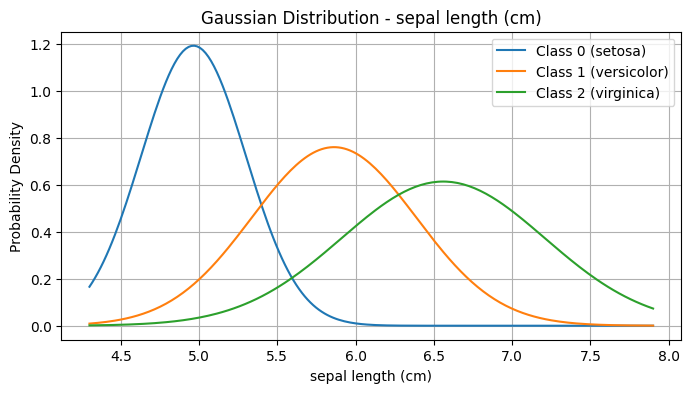

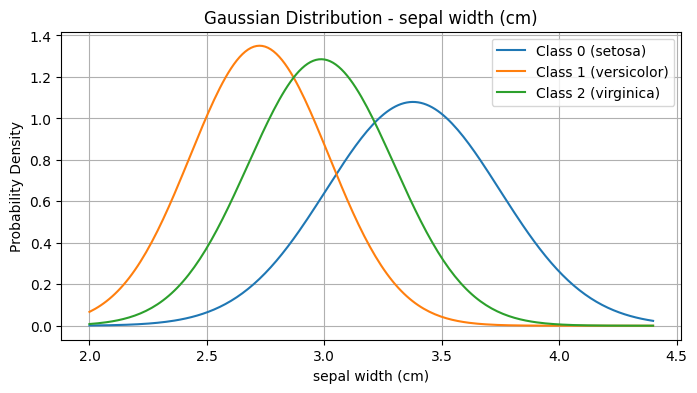

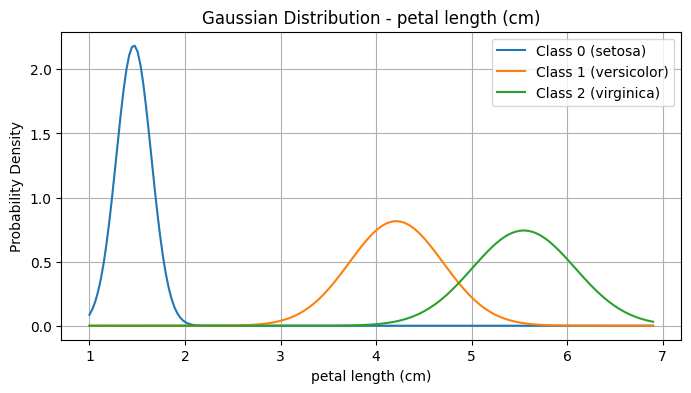

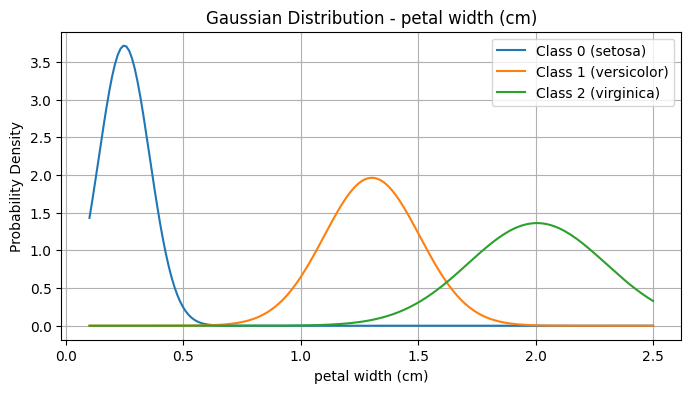

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

feature_names = iris.feature_names
num_features = len(feature_names)
num_classes = len(np.unique(y))

X_np = X.to_numpy() 

for feature_index in range(num_features):
    feature_name = feature_names[feature_index]
    x_vals = np.linspace(X_np[:, feature_index].min(), X_np[:, feature_index].max(), 200)

    plt.figure(figsize=(8, 4))

    for cls in range(num_classes):
        mean = gnb.theta_[cls, feature_index]
        std = np.sqrt(gnb.var_[cls, feature_index])
        y_vals = norm.pdf(x_vals, mean, std)
        plt.plot(x_vals, y_vals, label=f"Class {cls} ({iris.target_names[cls]})")

    plt.title(f"Gaussian Distribution - {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)

    plt.show()

### 6. Making Predictions

In [20]:
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy of Prediction on Iris Flower is: {accuracy}")

The Accuracy of Prediction on Iris Flower is: 0.9777777777777777


                            # Multinomial Naive Bayes                     

# Multinomial Naive Bayes

Multinomial Naive Bayes is one of the variation of Naive Bayes algorithm which is ideal for discrete data and is typically used in text classification problems. It models the frequency of words as counts and assumes each feature or word is multinomially distributed. MNB is widely used for tasks like classifying documents based on word frequencies like in spam email detection.

## How Does Multinomial Naive Bayes Work?

In Multinomial Naive bayes the word "Naive" means that the method assumes all features like words in a sentence are independent from each other and "Multinomial" refers to how many times a word appears or how often a category occurs. It works by using word counts to classify text. The main idea is that it assumes each word in a message or feature is independent of each others. This means the presence of one word doesn't affect the presence of another word which makes the model easy to use.

The model looks at how many times each word appears in messages from different categories (like "spam" or "not spam"). For example if the word "free" appears often in spam messages that will be used to help predict whether a new message is spam or not.


# Python Implementation of Multinomial Naive Bayes


In [21]:
# 1. Importing Libraries:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


# 2. Creating the Dataset
data = {
    'text': [
        'Free money now',
        'Call now to claim your prize',
        'Meet me at the park',
        'Let’s catch up later',
        'Win a new car today!',
        'Lunch plans?',
        'Congratulations! You won a lottery',
        'Can you send me the report?',
        'Exclusive offer for you',
        'Are you coming to the meeting?'
    ],
    'label': ['spam', 'spam', 'not spam', 'not spam', 'spam', 'not spam', 'spam', 'not spam', 'spam', 'not spam']
}

df = pd.DataFrame(data)

# 3. Mapping Labels to Numerical Values
df['label'] = df['label'].map({'spam': 1, 'not spam': 0})

# 4. Splitting the Data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Vectorizing the Text Data
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# 6. Training the Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

# 7. Making Predictions and Evaluating Accuracy
y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

# 8. Predicting for a Custom Message
custom_message = ["Congratulations, you've won a free vacation"]
print(custom_message)
custom_vector = vectorizer.transform(custom_message)
prediction = model.predict(custom_vector)
print("Prediction for custom message:", "Spam" if prediction[0] == 1 else "Not Spam")



Accuracy: 66.67%

["Congratulations, you've won a free vacation"]
Prediction for custom message: Spam


                     Bernoulli Naive Bayes               

# Bernoulli Naive Bayes

Bernoulli Naive Bayes is a subcategory of the Naive Bayes Algorithm. It is typically used when the data is binary and it models the occurrence of features using Bernoulli distribution. It is used for the classification of binary features such as 'Yes' or 'No', '1' or '0', 'True' or 'False' etc. Here it is to be noted that the features are independent of one another.

### Mathematics Behind Bernoulli Naive Bayes

In Bernoulli Naive Bayes, the probability of a class given a set of binary features is calculated using Bayes' Theorem. The formula is as follows:  
$$ P(C_k | x) = \frac{P(x | C_k) \cdot P(C_k)}{P(x)} $$
Where:
- \( P(C_k | x) \): Posterior probability of class \( C_k \) given the feature vector \( x \).
- \( P(x | C_k) \): Likelihood of feature vector \( x \) given class \( C_k \).
- \( P(C_k                  ) \): Prior probability of class \( C_k \).
- \( P(x) \): Marginal probability of feature vector \( x \).

### Bernoulli distribution
The likelihood \( P(x | C_k) \) is calculated using the Bernoulli distribution formula:
$$ P(x | C_k) = \prod_{i=1}^{n} P(x_i | C_k)^{x_i} \cdot (1 - P(x_i | C_k))^{1 - x_i} $$
Where:
- \( n \): Number of features.
- \( x_i \): Value of the \( i^{th} \) feature (0 or 1).
- \( P(x_i | C_k) \): Probability of feature \( x_i \) being 1 given class \( C_k \).

Bernoulli distribution is used for discrete probability calculation. It either calculates success or failure. Here the random variable is either 1 or 0 whose chance of occurring is either denoted by p or (1-p) respectively.

The mathematical formula is given as:
$$ P(X = x) = p^x \cdot (1 - p)^{1 - x} $$
Where:
- \( P(X = x) \): Probability of the random variable \( X \) taking the value \( x \).
- \( p \): Probability of success (i.e., \( X = 1 \)).
- \( (1 - p) \): Probability of failure (i.e., \( X = 0 \)).
- \( x \): Value of the random variable (either 0 or 1).



# Implementing Bernoulli Naive Bayes

#### 1. Importing Libraries

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#### 2. Data Analysis and Preprocessing

In [24]:
dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/spam_ham_dataset.csv"

df = pd.read_csv(dataset)
df = df[['text', 'label']]

df

,text,label
0,Subject: enron methanol ; meter # : 988291\nth...,ham
1,"Subject: hpl nom for january 9 , 2001\n( see a...",ham
2,"Subject: neon retreat\nho ho ho , we ' re arou...",ham
3,"Subject: photoshop , windows , office . cheap ...",spam
4,Subject: re : indian springs\nthis deal is to ...,ham
...,...,...
5166,Subject: put the 10 on the ft\nthe transport v...,ham
5167,Subject: 3 / 4 / 2000 and following noms\nhpl ...,ham
5168,Subject: calpine daily gas nomination\n>\n>\nj...,ham
5169,Subject: industrial worksheets for august 2000...,ham


In [25]:
df

,text,label
0,Subject: enron methanol ; meter # : 988291\nth...,ham
1,"Subject: hpl nom for january 9 , 2001\n( see a...",ham
2,"Subject: neon retreat\nho ho ho , we ' re arou...",ham
3,"Subject: photoshop , windows , office . cheap ...",spam
4,Subject: re : indian springs\nthis deal is to ...,ham
...,...,...
5166,Subject: put the 10 on the ft\nthe transport v...,ham
5167,Subject: 3 / 4 / 2000 and following noms\nhpl ...,ham
5168,Subject: calpine daily gas nomination\n>\n>\nj...,ham
5169,Subject: industrial worksheets for august 2000...,ham


In [27]:
df.shape

(5171, 2)

#### Count Vectorization

In [29]:
x = df["text"].values

y = df["label"].values

cv = CountVectorizer()

x = cv.fit_transform(x)

#### 4. Data Splitting, Model Training and Prediction

In [31]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

bnb = BernoulliNB(binarize=0.0)
model = bnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.84      0.98      0.91       732
        spam       0.92      0.56      0.70       303

    accuracy                           0.86      1035
   macro avg       0.88      0.77      0.80      1035
weighted avg       0.87      0.86      0.84      1035



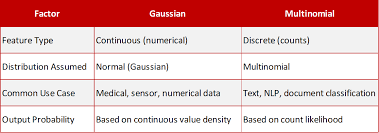